#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

In [8]:
#卷積層1

In [9]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

W0706 17:41:09.205865 140452372629312 deprecation.py:237] From /home/simon/tf_workspace/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4139: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [10]:
model.add(Dropout(rate=0.25))

W0706 17:41:09.763385 140452372629312 deprecation.py:506] From /home/simon/tf_workspace/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
#卷積層2與池化層2

In [13]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [14]:
model.add(Dropout(0.25))

In [15]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [17]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [18]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [19]:
model.add(Dense(10, activation='softmax'))

In [47]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [48]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [49]:
loss_opts = ['categorical_crossentropy', 'MSE', 'binary_crossentropy']
model.compile(loss=loss_opts[2], optimizer='sgd', metrics=['accuracy'])

'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

In [50]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)         

#[validation_split = 0.2] validation_split：在0和1之間浮動。用作驗證數據的訓練數據的分數。
#該模型將訓練數據的這一部分分開，不會對其進行訓練，並將在每個時期結束時評估該數據的損失和任何模型指標。
#[batch_size]：整數或None。每個梯度更新的樣本數。指定，batch_size為128

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 4s 101us/step - loss: 0.1692 - acc: 0.9335 - val_loss: 0.1818 - val_acc: 0.9286
Epoch 2/12
37500/37500 [==============================] - 4s 99us/step - loss: 0.1683 - acc: 0.9338 - val_loss: 0.1814 - val_acc: 0.9289
Epoch 3/12
37500/37500 [==============================] - 4s 96us/step - loss: 0.1687 - acc: 0.9337 - val_loss: 0.1815 - val_acc: 0.9286
Epoch 4/12
37500/37500 [==============================] - 4s 99us/step - loss: 0.1686 - acc: 0.9333 - val_loss: 0.1811 - val_acc: 0.9289
Epoch 5/12
37500/37500 [==============================] - 4s 94us/step - loss: 0.1689 - acc: 0.9334 - val_loss: 0.1806 - val_acc: 0.9291
Epoch 6/12
37500/37500 [==============================] - 3s 90us/step - loss: 0.1678 - acc: 0.9338 - val_loss: 0.1807 - val_acc: 0.9292
Epoch 7/12
37500/37500 [==============================] - 4s 112us/step - loss: 0.1677 - acc: 0.9339 - val_loss: 0.1803 - val_a

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

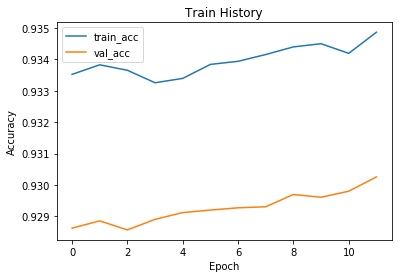

In [52]:
show_train_history('acc','val_acc')

### 評估模型準確率

scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
print()
print('[loss=\'categorical_crossentropy\']accuracy=',scores[1])

scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
print()
print('[loss=\'MSE\']accuracy=',scores[1])

In [53]:
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
print()
print('[loss=\'binary_crossentropy\']accuracy=',scores[1])

10000/10000 [==============================] - 0s 48us/step

[loss='binary_crossentropy']accuracy= 0.9298699791908264


# 結論:
* catergorical corssentropy : 0.6137
* MSE(Mean Squared Error) : 0.6271
* binary crossentropy : 0.9298

# Binary crossentropy在這個case中表現最好.